# **UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE**
### **DCA0200 - INTELIGÊNCIA ARTIFICIAL**
### **1ª LISTA DE EXERCÍCIOS - 2023.1**

### **Docente:** 
- Adrião Duarte Doria Neto

### **Discente:**
- Matheus Gomes Diniz Andrade

# Importação de Bibliotecas

In [115]:
import numpy  as np
import pandas as pd

In [116]:
import matplotlib.pyplot as plt
import seaborn           as sns

In [117]:
sns.set_theme()

# 1.


A tabela de dados abaixo ilustra a aplicação do método Naive-Bayes. Um determinado banco deve decidir se um cliente deve ou não receber um empréstimo bancário em função da sua condição de bom ou mau pagador. 

Considerando os dados de treinamento abaixo, aplique o classificador Naive-Bayes, para atribuir a classe (rótulo) para os registros 12 e 13:

| Registro | Tem casa própria | Estado Civil | Possui Carro | Rendimentos | Bom Pagador |
|:--------:|:----------------:|:------------:|:------------:|:-----------:|:-----------:|
|     1    |        Sim       |   Solteiro   |      Sim     |     Alto    |     Sim     |
|     2    |        Não       |    Casado    |      Sim     |    Médio    |     Não     |
|     3    |        Não       |   Solteiro   |      Não     |    Baixo    |     Não     |
|     4    |        Sim       |    Casado    |      Sim     |     Alto    |     Não     |
|     5    |        Não       |  Divorciado  |      Não     |    Médio    |     Sim     |
|     6    |        Não       |    Casado    |      Não     |    Baixo    |     Não     |
|     7    |        Sim       |  Divorciado  |      Sim     |     Alto    |     Sim     |
|     8    |        Não       |   Solteiro   |      Sim     |    Médio    |     Sim     |
|     9    |        Não       |    Casado    |      Sim     |    Baixo    |     Não     |
|    10    |        Não       |   Solteiro   |      Não     |    Médio    |     Sim     |
|    11    |        Sim       |  Divorciado  |      Não     |    Médio    |     Não     |
|    12    |        Não       |  Divorciado  |      Sim     |     Alto    |      ?      |
|    13    |        Sim       |   Solteiro   |      Não     |    Médio    |      ?      |

In [118]:
has_own_home   = [   "Yes",      "No",     "No",     "Yes",       "No",      "No",      "Yes",      "No",      "No",      "No",      "Yes"]
marital_status = ["Single", "Married", "Single", "Married", "Divorced", "Married", "Divorced",  "Single", "Married",  "Single", "Divorced"]
have_car       = [   "Yes",     "Yes",     "No",     "Yes",       "No",      "No",      "Yes",     "Yes",     "Yes",      "No",       "No"]
income         = [  "High", "Average",    "Low",    "High",  "Average",     "Low",     "High", "Average",     "Low", "Average",  "Average"]
good_payer     = [   "Yes",      "No",     "No",      "No",      "Yes",      "No",      "Yes",     "Yes",      "No",     "Yes",       "No"]

In [119]:
bank_table = pd.DataFrame({
    "has_own_home": has_own_home,
    "marital_status": marital_status,
    "have_car": have_car,
    "income": income,
    "good_payer": good_payer
})

bank_table

,has_own_home,marital_status,have_car,income,good_payer
0,Yes,Single,Yes,High,Yes
1,No,Married,Yes,Average,No
2,No,Single,No,Low,No
3,Yes,Married,Yes,High,No
4,No,Divorced,No,Average,Yes
5,No,Married,No,Low,No
6,Yes,Divorced,Yes,High,Yes
7,No,Single,Yes,Average,Yes
8,No,Married,Yes,Low,No
9,No,Single,No,Average,Yes


In [120]:
has_own_home   = [      "No",     "Yes"]
marital_status = ["Divorced",  "Single"]
have_car       = [     "Yes",      "No"]
income         = [    "High", "Average"]

In [121]:
new_entries = pd.DataFrame({
    "has_own_home": has_own_home,
    "marital_status": marital_status,
    "have_car": have_car,
    "income": income
})

new_entries

,has_own_home,marital_status,have_car,income
0,No,Divorced,Yes,High
1,Yes,Single,No,Average


O que desejamos calcular é:
- $P($good_payer$~|~$ has_own_home$=$No, marital_status$=$Divorced, have_car$=$Yes, income$=$High$)$
- $P($good_payer$~|~$ has_own_home$=$Yes, marital_status$=$Single, have_car$=$No, income$=$Average$)$

Para calcular ambos os casos, usamos que:

$P(H~|~E) = \frac{P(H) \cdot \prod_{i=1}^N P(e_i~|~H)}{\sum_j P(E~|~h=h_j) \cdot P(h=h_j)}$

Sendo:
- $H$ : Hipótese
- $E$ : Evidência
- $E = \bigcup_{i=1}^N e_i$

Para ambos os casos, temos que calcular 2 hipóteses:
- $H$ : good_payer $=$ Yes
- $H$ : good_payer $=$ No

E decidir pelo critério MAP (Máxima Probabilidade a Posteriori)

$\underset{j}{argmax} \left(P(h=h_j) \prod_{i=1}^N P(e_i~|~h=h_j) \right)$

In [122]:
def naive_bayes(df, target, dependencies):
  dependencies_columns = list(dependencies.keys())
  results              = {}

  df_len = len(df)

  for value in df[target].unique():
    data     = df.query(f"{target} == '{value}'")
    data_len = len(data)
    
    results[f"{target} = {value}"] = data_len / df_len

    for column in dependencies_columns:
      dependencie_value = dependencies[column]

      results[f"{target} = {value}"] *= len(data.query(f"{column} == @dependencie_value")) / data_len

  return max(results, key=results.get)

#### $P($good_payer$~|~$ has_own_home$=$No, marital_status$=$Divorced, have_car$=$Yes, income$=$High$)$

Probabilidades a priori:
- $P($good_payer$=$Yes$) = \frac{5}{11}$
- $P($good_payer$=$No$) = \frac{6}{11}$

Probabilidades a posteriori:
- $P($has_own_home$=$No$~|~$good_payer$=$Yes$) = \frac{3}{5}$
- $P($marital_status$=$Divorced$~|~$good_payer$=$Yes$) = \frac{2}{5}$
- $P($have_car$=$Yes$~|~$good_payer$=$Yes$) = \frac{3}{5}$
- $P($income$=$High$~|~$good_payer$=$Yes$) = \frac{2}{5}$

- $P($has_own_home$=$No$~|~$good_payer$=$No$) = \frac{4}{6}$
- $P($marital_status$=$Divorced$~|~$good_payer$=$No$) = \frac{1}{6}$
- $P($have_car$=$Yes$~|~$good_payer$=$No$) = \frac{3}{6}$
- $P($income$=$High$~|~$good_payer$=$No$) = \frac{1}{6}$

$H$ : good_payer$=$Yes

$P(H~|~E) = \frac{\frac{5}{11} \cdot \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{2}{5}}{\frac{5}{11} \cdot \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{2}{5} + \frac{6}{11} \cdot \frac{4}{6} \cdot \frac{1}{6} \cdot \frac{3}{6} \cdot \frac{1}{6}} = \frac{0.026182}{0.031232} = 0.838307$

$H$ : good_payer$=$No

$P(H~|~E) = \frac{\frac{6}{11} \cdot \frac{4}{6} \cdot \frac{1}{6} \cdot \frac{3}{6} \cdot \frac{1}{6}}{\frac{5}{11} \cdot \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{2}{5} + \frac{6}{11} \cdot \frac{4}{6} \cdot \frac{1}{6} \cdot \frac{3}{6} \cdot \frac{1}{6}} = \frac{0.005051}{0.031232} = 0.161725$

In [123]:
dependencies = {
  "has_own_home": "No", 
  "marital_status": "Divorced",
  "have_car": "Yes",
  "income": "High"
}

naive_bayes(bank_table, "good_payer", dependencies)

'good_payer = Yes'

#### $P($good_payer$~|~$ has_own_home$=$Yes, marital_status$=$Single, have_car$=$No, income$=$Average$)$

Probabilidades a priori:
- $P($good_payer$=$Yes$) = \frac{5}{11}$
- $P($good_payer$=$No$) = \frac{6}{11}$

Probabilidades a posteriori:
- $P($has_own_home$=$Yes$~|~$good_payer$=$Yes$) = \frac{2}{5}$
- $P($marital_status$=$Single$~|~$good_payer$=$Yes$) = \frac{3}{5}$
- $P($have_car$=$No$~|~$good_payer$=$Yes$) = \frac{2}{5}$
- $P($income$=$Average$~|~$good_payer$=$Yes$) = \frac{3}{5}$

- $P($has_own_home$=$Yes$~|~$good_payer$=$No$) = \frac{2}{6}$
- $P($marital_status$=$Single$~|~$good_payer$=$No$) = \frac{1}{6}$
- $P($have_car$=$No$~|~$good_payer$=$No$) = \frac{3}{6}$
- $P($income$=$Average$~|~$good_payer$=$No$) = \frac{2}{6}$

$H$ : good_payer$=$Yes

  $P(H~|~E) = \frac{\frac{5}{11} \cdot \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{3}{5}}{\frac{5}{11} \cdot \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{3}{5} + \frac{6}{11} \cdot \frac{2}{6} \cdot \frac{1}{6} \cdot \frac{3}{6} \cdot \frac{2}{6}} = \frac{0.026182}{0.031232} = 0.838307$

$H$ : good_payer$=$No

  $P(H~|~E) = \frac{\frac{6}{11} \cdot \frac{2}{6} \cdot \frac{1}{6} \cdot \frac{3}{6} \cdot \frac{2}{6}}{\frac{5}{11} \cdot \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{3}{5} + \frac{6}{11} \cdot \frac{2}{6} \cdot \frac{1}{6} \cdot \frac{3}{6} \cdot \frac{2}{6}} = \frac{0.005051}{0.031232} = 0.161725$

In [124]:
dependencies = {
  "has_own_home": "Yes", 
  "marital_status": "Single",
  "have_car": "No",
  "income": "Average"
}

naive_bayes(bank_table, "good_payer", dependencies)

'good_payer = Yes'

# 2.

A rede bayesiana abaixo concerne ao problema de partida de um carro, de uma forma bem simplificada:

_(Extraído do Livro Bayesian Reasoning and Macine Learning - D. Barber)_

<br>
  <img src="https://drive.google.com/uc?id=1IvN9KGrWpLA1iaPioZWmiYTZx6hfjFLW">
<br>

As variáveis aleatórias envolvidas são:
- b = battery
- g = gauge
- f = fuel
- t = turn over
- s = start

As probabilidades referentes a rede bayesiana são dadas por:

<br>
  <img src="https://drive.google.com/uc?id=1hym0zksr5Of6JTPTBWekx1hgYnAGmoba">
<br>

Um agente inteligente com base nas inferências, isto é, no cálculo da P(f=empty | s=false) (a probabilidade do tanque estar vazio dado que o carro não deu partida) e da P(b=bad | s=false)(a probabilidade da bateria estar descarregada e o carro não deu partida), deve decidir qual o problema mais provável pela não partida do carro. Apresente a solução e implemente os cálculos de forma computacional.

Pela tabela, conseguimos a seguinte rede bayesiana:

<br>
  <img src="https://drive.google.com/uc?id=1ydX1TIA217XJd2syz66uezKVXGFazTik">
<br>


## $P($f $=$ empty$~|~$ s $=$ false$)$

Dada a falta de valor para 3 classes, é necessário considerar todas as possibilidade para elas.

$P($f $=$ empty$~|~$s $=$ false$,$ b $=B,$ t $=T$)$

- $B =$ { bad , good }
- $T =$ { true , false }
- $G =$ { empty , not empty }

$\sum_{k=1}^{2} \sum_{j=1}^{2} \sum_{i=1}^{2} P($f $=$ empty $ | $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k)$

- $B =$ { $b_1=$ bad , $b_2=$ good }
- $T =$ { $t_1=$ true , $t_2=$ false }
- $G =$ { $g_1=$ empty , $g_2=$ not empty }

$P($f $=$ empty $ | $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k)$

$= P($f $=$ empty $, $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k) / P($s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k)$

--- 

$P($f $=$ empty $, $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k)$

$ = P($b $=b_i) P($f $=$ empty$) P($g $=g_k | $b $=b_i , $f $=$ empty$) P($t $=t_j | $b $=b_i) P($s $=$ false $ | $f $=$ empty$, $ t $=t_j) = $

$P($b $=b_1) P($f $=$ empty$) P($g $=g_1 | $b $=b_1 , $f $=$ empty$) P($t $=t_1 | $b $=b_1) P($s $=$ false $ | $f $=$ empty$, $ t $=t_1) +$

$P($b $=b_2) P($f $=$ empty$) P($g $=g_1 | $b $=b_2 , $f $=$ empty$) P($t $=t_1 | $b $=b_2) P($s $=$ false $ | $f $=$ empty$, $ t $=t_1) +$

$P($b $=b_1) P($f $=$ empty$) P($g $=g_1 | $b $=b_1 , $f $=$ empty$) P($t $=t_2 | $b $=b_1) P($s $=$ false $ | $f $=$ empty$, $ t $=t_2) +$

$P($b $=b_2) P($f $=$ empty$) P($g $=g_1 | $b $=b_2 , $f $=$ empty$) P($t $=t_2 | $b $=b_2) P($s $=$ false $ | $f $=$ empty$, $ t $=t_2) +$

$P($b $=b_1) P($f $=$ empty$) P($g $=g_2 | $b $=b_1 , $f $=$ empty$) P($t $=t_1 | $b $=b_1) P($s $=$ false $ | $f $=$ empty$, $ t $=t_1) +$

$P($b $=b_2) P($f $=$ empty$) P($g $=g_2 | $b $=b_2 , $f $=$ empty$) P($t $=t_1 | $b $=b_2) P($s $=$ false $ | $f $=$ empty$, $ t $=t_1) +$

$P($b $=b_1) P($f $=$ empty$) P($g $=g_2 | $b $=b_1 , $f $=$ empty$) P($t $=t_2 | $b $=b_1) P($s $=$ false $ | $f $=$ empty$, $ t $=t_2) +$

$P($b $=b_2) P($f $=$ empty$) P($g $=g_2 | $b $=b_2 , $f $=$ empty$) P($t $=t_2 | $b $=b_2) P($s $=$ false $ | $f $=$ empty$, $ t $=t_2) =$


$0.05 \cdot 0.1 \cdot 0.97 \cdot 0.04 \cdot 0.92 +$

$0.95 \cdot 0.1 \cdot 0.98 \cdot 0.90 \cdot 0.92 +$

$0.05 \cdot 0.1 \cdot 0.97 \cdot 0.96 \cdot 0.99 +$

$0.95 \cdot 0.1 \cdot 0.98 \cdot 0.10 \cdot 0.99 +$

$0.05 \cdot 0.1 \cdot 0.03 \cdot 0.04 \cdot 0.92 +$

$0.95 \cdot 0.1 \cdot 0.02 \cdot 0.90 \cdot 0.92 +$

$0.05 \cdot 0.1 \cdot 0.03 \cdot 0.96 \cdot 0.99 +$

$0.95 \cdot 0.1 \cdot 0.02 \cdot 0.10 \cdot 0.99 =$

$0.093001$

---

$P($s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k) = $

$P($f $=$ empty $, $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k) + P($f $=$ not empty $, $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k)$

$P($f $=$ not empty $, $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k) = $

$P($b $=b_1) P($f $=$ not empty$) P($g $=g_1 | $b $=b_1 , $f $=$ not empty$) P($t $=t_1 | $b $=b_1) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_1) +$

$P($b $=b_2) P($f $=$ not empty$) P($g $=g_1 | $b $=b_2 , $f $=$ not empty$) P($t $=t_1 | $b $=b_2) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_1) +$

$P($b $=b_1) P($f $=$ not empty$) P($g $=g_1 | $b $=b_1 , $f $=$ not empty$) P($t $=t_2 | $b $=b_1) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_2) +$

$P($b $=b_2) P($f $=$ not empty$) P($g $=g_1 | $b $=b_2 , $f $=$ not empty$) P($t $=t_2 | $b $=b_2) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_2) +$

$P($b $=b_1) P($f $=$ not empty$) P($g $=g_2 | $b $=b_1 , $f $=$ not empty$) P($t $=t_1 | $b $=b_1) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_1) +$

$P($b $=b_2) P($f $=$ not empty$) P($g $=g_2 | $b $=b_2 , $f $=$ not empty$) P($t $=t_1 | $b $=b_2) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_1) +$

$P($b $=b_1) P($f $=$ not empty$) P($g $=g_2 | $b $=b_1 , $f $=$ not empty$) P($t $=t_2 | $b $=b_1) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_2) +$

$P($b $=b_2) P($f $=$ not empty$) P($g $=g_2 | $b $=b_2 , $f $=$ not empty$) P($t $=t_2 | $b $=b_2) P($s $=$ false $ | $f $=$ not empty$, $ t $=t_2) =$

---

$P($f $=$ empty $ | $ s $=$ false$,$ b $=b_i, $ t $=t_j,$ g $=g_k)$

## $P($b $=$ bad$~|~$s $=$ false$)$

Dada a falta de valor para 3 classes, é necessário considerar todas as possibilidade para elas.

$P($b $=$ bad$~|~$s $=$ false$,$ f $=F$, t $=T$, g $=G)$
- $F =$ { empty , not empty }
- $T =$ { true , false }
- $G =$ { empty , not empty }

$\sum_{k=1}^{2} \sum_{j=1}^{2} \sum_{i=1}^{2} P($b $=$ bad$~|~$s $=$ false$,$ f $=f_i, $ t $=t_j, $ g $=g_k)$

- $F =$ { $f_1=$ empty , $f_2=$ not empty }
- $T =$ { $t_1=$ true , $t_2=$ false }
- $G =$ { $g_1=$ empty , $g_2=$ not empty }

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ empty$, $ t $=$ true$, $ g $=$ empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ not empty$, $ t $=$ true$, $ g $=$ empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ empty$, $ t $=$ false$, $ g $=$ empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ not empty$, $ t $=$ false$, $ g $=$ empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ empty$, $ t $=$ true$, $ g $=$ not empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ not empty$, $ t $=$ true$, $ g $=$ not empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ empty$, $ t $=$ false$, $ g $=$ not empty$)+$

$P($b $=$ bad$~|~$s $=$ false$,$ f $=$ not empty$, $ t $=$ false$, $ g $=$ not empty$)$

# 3.



Uma rede de crença (ou rede bayesiana) modela a relação entre as variáveis oil (price of oil), inf (inflation), eh (economy health), bp (Britishh Petroleum Stock price), rt (retailer stock pricec).

Cada variável tem os estados **low** e **high**, exceto a variável bp que tem adicionalmente o estado **normal**. A rede de crença, modela as variáveis de acordo com a tabela abaixo.

<br>
  <img src="https://drive.google.com/uc?id=1EsySCsM0QY003t3wf5K7Lnj3ge3DvIb-">
<br>


A partir da tabela, pode-se gerar a rede de crença:

<br>
  <img src="https://drive.google.com/uc?id=1NB5TjnFunv1CkGzLeLiSb_K455Jq79kC">
<br>

## 3.a

Determine o gráfico da rede bayesiana para esse problema

<br>
  <img src="https://drive.google.com/uc?id=1HzQTYZuRCBW62R77qI9Mynq-ecDWDHTp">
<br>

## 3.b

Dado que bp=normal e rt=high, qual é a probabilidade de que a inflação seja alta?

$P($inf $=$ high$~|~$bp $=$ normal$,$ rt $=$ high$)$

# 4.


Considere o problema de decisão caracterizado por uma sequência de eventos que
podem ser apresentados por um gráfico conhecido como rede de decisão. Uma casa
está a venda. A casa foi construída a mais de dez anos. João está interessado em
comprar a casa como investimento. Isto é fazer uma pequena reforma e revender a
casa. 

Ele considera que a casa tem 70% de chance de estar realmente em bom estado. Se a casa estiver realmente em bom estado ele pode após uma pequena reforma ter um lucro de 30.000 reais na revenda. Caso contrário ele vai ter um prejuízo de 18.000,00 reais. 

João sabe que se ele contratar um profissional especializado em inspecionar imóveis ele terá uma melhor avaliação da situação da casa. Entretanto a contratação deste profissional requer um custo de 3.600,00 reais. A tabela abaixo indica as probabilidades envolvidas no processo de fazer ou não a inspeção e as condições do imóvel.

Tabela de Probabilidades:

<br>
  <img src="https://drive.google.com/uc?id=1YNRlwkk8VHbmAkJv2-U4lOhKP9ftHcsg">
<br>

- I = Inspect
- C = Property Conditions
- A = Avaliation

<br>

Tabelas de Utilidades:

<br>
  <img src="https://drive.google.com/uc?id=12DQBXSt4wtErLfBv47JKnDxULO3Bhxsy">
<br>

- BH = Buy House
- C = Property Conditions
- U = Utility Function

<br>
  <img src="https://drive.google.com/uc?id=1_hXT8O_qM4dwxHD1Fjn_lWjtJL1c57FJ">
<br>

- I = Inspect
- U = Utility Function



## 4.a

Construa a rede bayesiana para esse problema


<br>
  <img height=600 src="https://drive.google.com/uc?id=1TwAx3W7BNF0CzmTugxIUxeyPA_dRBz4P">
<br>

## 4.b

Qual a melhor decisão?

Fazer a inspeção

# 5.

Considere o problema de tomada de decisão caracterizado por uma sequência de
eventos que podem ser apresentado por um grafo conhecido como rede de decisão. O
problema em questão consiste das escolhas e das decisões por parte de uma empresa de petróleo. Uma determinada empresa petrolífera obteve a concessão para explorar uma certa região. Os estudos anteriores (testes preliminares) estimam a probabilidade de existir petróleo nessa região em 20%. A companhia pode optar por um novo teste, que custa US\$ 100.000,00, sendo que, se realmente existe petróleo, esse teste dirá com uma probabilidade de 0.85 que existe, e se realmente não existe, dirá com probabilidade 0.70 que não existe. Considerando que o custo de perfuração será de US\$ 1.000.000,00 e que, se for encontrado petróleo, a companhia receberá US\$ 20.000.000,00 pela produção. 

Considere, portanto os seguintes eventos e os seus complementos: 
1. Evento T (a companhia faz o teste); 
2. Evento F (o teste é favorável à existência de petróleo;
3. Evento P (a companhia perfura o poço); 
4. Evento E (existe petróleo).

Observações:
- O evento inicial da árvore é se a companhia faz ou não faz o teste
- Para cada evento tem o seu complementar
- Para o cálculo da utilidade esperada, determine, antes, as probabilidade condicionais a posteriori com base no teorema de bayes

## 5.a

Construa a rede indicando os nós de decisões e os nós ao acaso (variáveis aleatórias). Considere as funções de utilidade, representadas por losangos, como
sendo o `lucro = receita - despesas`, calculado em cada percurso da árvore.

## 5.b

Determine em cada nó dos percursos da árvore a utilidade esperada.

## 5.c

Usando o critério da utilidade máxima esperada, determine a melhor decisão.

## 5.d

Qual o valor esperado do lucro da companhia se for tomada a melhor decisão?

## 5.e

Apresente também a solução deste problema através de um programa
computacional e simule diferentes situações alterando o valor das probabilidades.

# 6.

Considere o problema de separação de padrões constituído por duas classes
$w_1$ e $w_2$ . Assumindo que as distribuições associadas a cada classe são gaussianas com probabilidades a priori dadas por $\left ( P(w_1) = P(w_2) = \frac{1}{2}\right )$. 

As distribuições
gaussianas para cada classe apresentam os seguintes parâmetros (vetor média e
matriz de covariância) dados por:

$\mu_1 = \begin{bmatrix}
3\\ 
6
\end{bmatrix}, $
$\sum_1 = \begin{bmatrix}
\frac{1}{2} & 0\\ 
0 & 2
\end{bmatrix}, $
$\sum_1^{-1} = \begin{bmatrix}
2 & 0\\ 
0 & \frac{1}{2}
\end{bmatrix}, $

$\mu_2 = \begin{bmatrix}
3\\ 
-2
\end{bmatrix}, $
$\sum_2 = \begin{bmatrix}
2 & 0\\ 
0 & 2
\end{bmatrix}, $
$\sum_2^{-1}  = \begin{bmatrix}
\frac{1}{2} & 0\\ 
0 & \frac{1}{2}
\end{bmatrix}, $

As funções discriminantes $g_1(\mathbf{x})$ e $g_2(\mathbf{x})$ definem a superfície de separação ou decisão entre os padrões ou classes associadas as distribuições gaussianas. A superfície de separação é obtida fazendo $g_1(\mathbf{x}) = g_2(\mathbf{x})$.

Para as condições deste problema as funções descriminantes $g_i(\mathbf{x}), i=1, 2$ podem ser calculadas pela equação abaixo:

$g_i(\mathbf{x}) = -\frac{1}{2}\left ( \left ( \mathbf{x} - \mathbf{\mu}_i\right )^t \cdot \sum_i^{-1} \cdot  \left ( \mathbf{x} - \mathbf{\mu}_i\right ) \right ) - \frac{1}{2} \cdot ln\left | \sum_i \right |, i=1, 2$

- $\mu$ : Vetor Média
- $\sum$ : Matriz de Covariância
- $\sum^{-1}$ : Inversa da Matriz de Covariância
- $\left | \sum \right |$ : Determinante da Matriz de Covariância

## 6.a

Mostre que a superfície de decisão é dada por

$x_2 = 3.514 - 1.125 \cdot x_1 + 0.1875 \cdot x_1^2$

### Demonstração:

$g_1(\mathbf{x}) = g_2(\mathbf{x})$

$-\frac{1}{2}\left ( \left ( \mathbf{x} - \mathbf{\mu}_1\right )^t \cdot \sum_1^{-1} \cdot  \left ( \mathbf{x} - \mathbf{\mu}_1\right ) \right ) - \frac{1}{2} \cdot ln\left | \sum_1 \right | = -\frac{1}{2}\left ( \left ( \mathbf{x} - \mathbf{\mu}_2\right )^t \cdot \sum_2^{-1} \cdot  \left ( \mathbf{x} - \mathbf{\mu}_2\right ) \right ) - \frac{1}{2} \cdot ln\left | \sum_2 \right |$

$\left ( \left ( \mathbf{x} - \mathbf{\mu}_1\right )^t \cdot \sum_1^{-1} \cdot  \left ( \mathbf{x} - \mathbf{\mu}_1\right ) \right ) + ln\left | \sum_1 \right | = \left ( \left ( \mathbf{x} - \mathbf{\mu}_2\right )^t \cdot \sum_2^{-1} \cdot  \left ( \mathbf{x} - \mathbf{\mu}_2\right ) \right ) + ln\left | \sum_2 \right |$

$\left ( \begin{bmatrix} x_1\\ x_2 \end{bmatrix} - \begin{bmatrix} 3 \\ 6 \end{bmatrix} \right )^t \begin{bmatrix} 2 & 0\\ 0 & \frac{1}{2} \end{bmatrix} \left ( \begin{bmatrix} x_1\\ x_2 \end{bmatrix} - \begin{bmatrix} 3 \\ 6 \end{bmatrix} \right ) + ln\begin{vmatrix} \frac{1}{2} & 0 \\ 0 & 2 \end{vmatrix} =
\left ( \begin{bmatrix} x_1\\ x_2 \end{bmatrix} - \begin{bmatrix} 3 \\ -2 \end{bmatrix} \right )^t \begin{bmatrix} \frac{1}{2} & 0\\ 0 & \frac{1}{2} \end{bmatrix} \left ( \begin{bmatrix} x_1\\ x_2 \end{bmatrix} - \begin{bmatrix} 3 \\ -2 \end{bmatrix} \right ) + ln\begin{vmatrix} 2 & 0 \\ 0 & 2 \end{vmatrix}$

$\begin{bmatrix} x_1 - 3 \\ x_2 - 6 \end{bmatrix} ^t \begin{bmatrix} 2 & 0\\ 0 & \frac{1}{2} \end{bmatrix} \begin{bmatrix} x_1 - 3 \\ x_2 - 6 \end{bmatrix} + ln\begin{vmatrix} \frac{1}{2} & 0 \\ 0 & 2 \end{vmatrix} =
\begin{bmatrix} x_1 - 3 \\ x_2 + 2 \end{bmatrix} ^t \begin{bmatrix} \frac{1}{2} & 0\\ 0 & \frac{1}{2} \end{bmatrix} \begin{bmatrix} x_1 - 3 \\ x_2 + 2 \end{bmatrix} + ln\begin{vmatrix} 2 & 0 \\ 0 & 2 \end{vmatrix}$

$2 (x_1 - 3)^2 + \frac{1}{2} (x_2 - 6)^2 + ln(1) = \frac{1}{2} (x_1 - 3)^2 + \frac{1}{2} (x_2 + 2)^2 + ln(4)$

$x_2 = \frac{59}{16} - \frac{ln(2)}{4} - \frac{9}{8} x_1 + \frac{3}{16} x_1^2 $

$x_2 = 3.514 - 1.125 x_1 + 0.1875 x_1^2$



## 6.b

Trace o gráfico da superfície de decisão

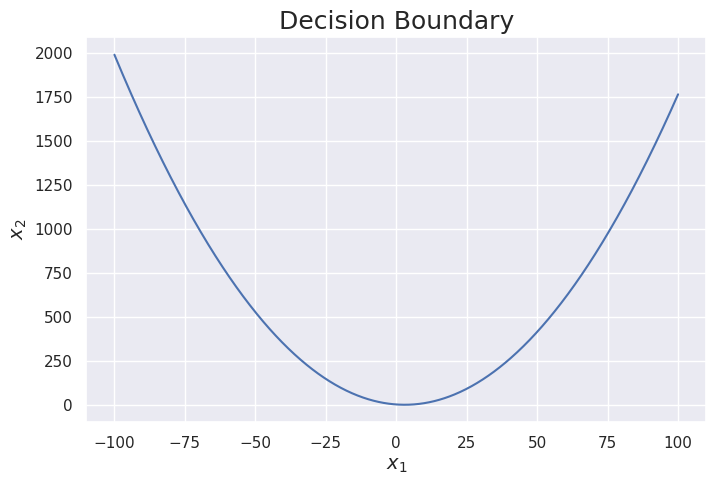

In [125]:
fig, ax = plt.subplots(figsize=(8, 5))

x1 = np.linspace(-100, 100, 1000)
x2 = 3.514 - 1.125 * x1 + 0.1875 * (x1**2)

ax.plot(x1, x2)

ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Decision Boundary", fontsize=18)

plt.show()

## 6.c

Indique a que classe pertence os padrões

$\mathbf{x_1} = \begin{bmatrix}
4\\ 
5
\end{bmatrix}$

$\mathbf{x_2} = \begin{bmatrix}
-3\\ 
4
\end{bmatrix}$

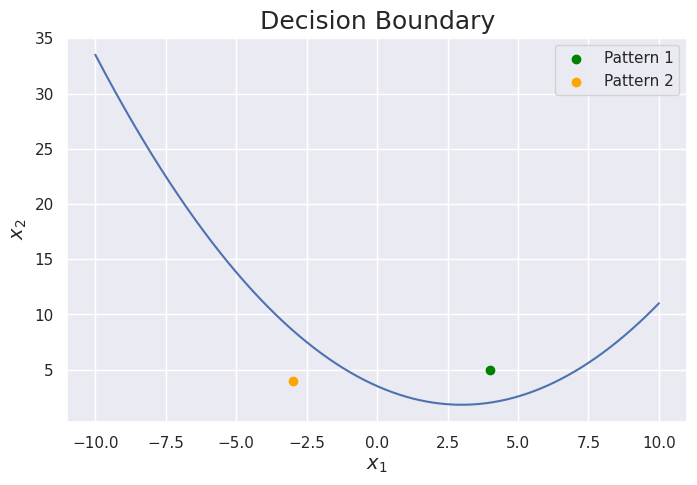

In [126]:
fig, ax = plt.subplots(figsize=(8, 5))

x1 = np.linspace(-10, 10, 1000)
x2 = 3.514 - 1.125 * x1 + 0.1875 * (x1**2)

ax.plot(x1, x2)
ax.scatter(4, 5, label="Pattern 1", c="green")
ax.scatter(-3, 4, label="Pattern 2", c="orange")

ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Decision Boundary", fontsize=18)

plt.legend()
plt.show()

# Trabalhos

Escolha dois dos três trabalhos abaixo:

- Trabalho1: Pesquise e apresente um trabalho sobre o algoritmo Naïve-Bayes para a detecção de Spam em mensagens de email ou para classificar páginas de texto com base em um tema de interesse (esporte, política, ...etc.) presente nas palavras que aparecem nas páginas.

- Trabalho 2: Pesquise e apresente um trabalho sobre Random Forest com uma ou mais aplicações de livre escolha.

- Trabalho 3: Pesquise e apresente um estudo sobre redes bayesianas na IA com uma ou mais aplicações de livre escolha.

In [127]:
import pickle

import pandas as pd
import numpy  as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import RandomizedSearchCV
from sklearn.metrics                 import confusion_matrix

from joblib import dump, load

## Hate Speech and Offensive Language

[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset) 


In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble    import RandomForestClassifier

import re
import nltk
import string

from nltk.corpus import stopwords

stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Aquisition

In [129]:
twitter_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/twitter.csv", index_col=[0])

twitter_data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [130]:
twitter_data.shape

(24783, 6)

### Exploratory Data Analysis

In [131]:
twitter_data["labels"] = twitter_data["class"].map({
  0: "Hate Speech", 
  1: "Offensive Language", 
  2: "No Hate and Offensive"
})

twitter_data.drop(columns=["class"], inplace=True)

twitter_data.head()

,count,hate_speech,offensive_language,neither,tweet,labels
0,3,0,0,3,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


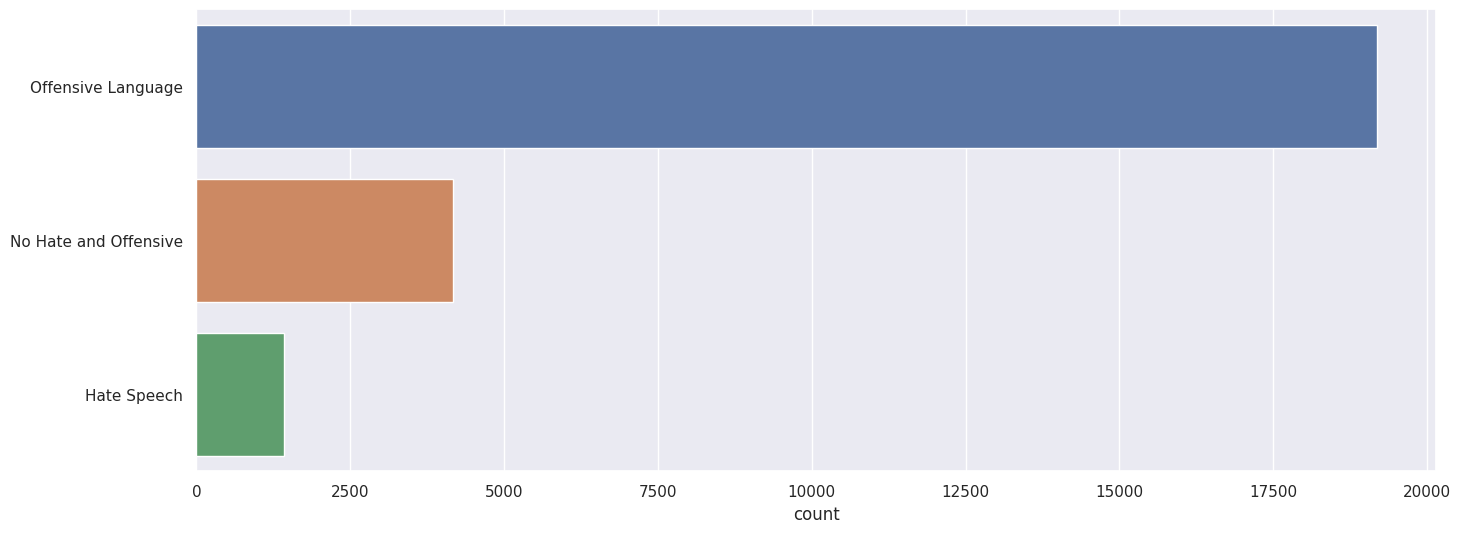

In [132]:
fig, ax = plt.subplots(figsize=(16, 6))

ax = sns.countplot(data=twitter_data, y="labels", order=["Offensive Language", "No Hate and Offensive", "Hate Speech"])

ax.set_ylabel("")

plt.show()

In [133]:
twitter_data["labels"].value_counts()

Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64

### Data Treatment

<img width=700 src="https://machinelearningmastery.com/wp-content/uploads/2019/09/Header_smaller_text_better-1.png">

**The accuracy paradox** :
> "It is the case where your accuracy measures tell the story that you have excellent accuracy (such as 90%), but the accuracy is only reflecting the underlying class distribution".

[8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

In [134]:
MIN_SIZE = twitter_data["labels"].value_counts().min()

In [135]:
def balance(dataset):
  datasets = []

  for value in dataset["labels"].unique():
    query_data  = dataset.query(f"labels == @value")
    sorted_data = query_data.sort_values(by=["count"], ascending=False)

    datasets.append(sorted_data.query(f"labels == @value").reset_index(drop=True).iloc[:MIN_SIZE])

  return pd.concat(datasets, ignore_index=True)

In [136]:
twitter_data = balance(twitter_data)

In [137]:
twitter_data.shape

(4290, 6)

In [138]:
def clean(text):
    text = str(text).lower()

    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)

    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text

In [139]:
twitter_data["tweet"] = twitter_data["tweet"].apply(clean)

In [140]:
twitter_data = twitter_data[["tweet", "labels"]]

In [141]:
twitter_data.head(10)

,tweet,labels
0,rt elisaamartinez happi birthday cotton picker...,No Hate and Offensive
1,rt hoe emma watson,No Hate and Offensive
2,id rather follow girl instagram rather bird br...,No Hate and Offensive
3,rt mindonsuccess mother trash man ask everyda...,No Hate and Offensive
4,pretti girl wit bird brainswhat wast smh,No Hate and Offensive
5,cant wait till get full appetit back ate half ...,No Hate and Offensive
6,wonder charli brown would say day,No Hate and Offensive
7,rt bitterarab halloween fast approach pleas un...,No Hate and Offensive
8,earli bird get worm gogetit,No Hate and Offensive
9,nytim seem dont come trash nobodi outsid holly...,No Hate and Offensive


### Creating Train and Test data

In [142]:
x = np.array(twitter_data["tweet"])
y = np.array(twitter_data["labels"])

In [143]:
cv = CountVectorizer()
X  = cv.fit_transform(x)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [145]:
pd.DataFrame(y_train).value_counts()

Hate Speech              1144
No Hate and Offensive    1144
Offensive Language       1144
dtype: int64

### Training Model

In [146]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

In [147]:
rfc = RandomForestClassifier()

param_distributions = {
  "n_estimators": list(range(10, 201)),
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 5, 10, 15]
}

RSCV = RandomizedSearchCV(rfc, param_distributions, random_state=42)

In [148]:
RSCV.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]},
                   random_state=42)

In [149]:
rfc = RSCV.best_estimator_

In [150]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 132,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Models Performance

In [151]:
mnb.score(X_test, y_test)

0.7832167832167832

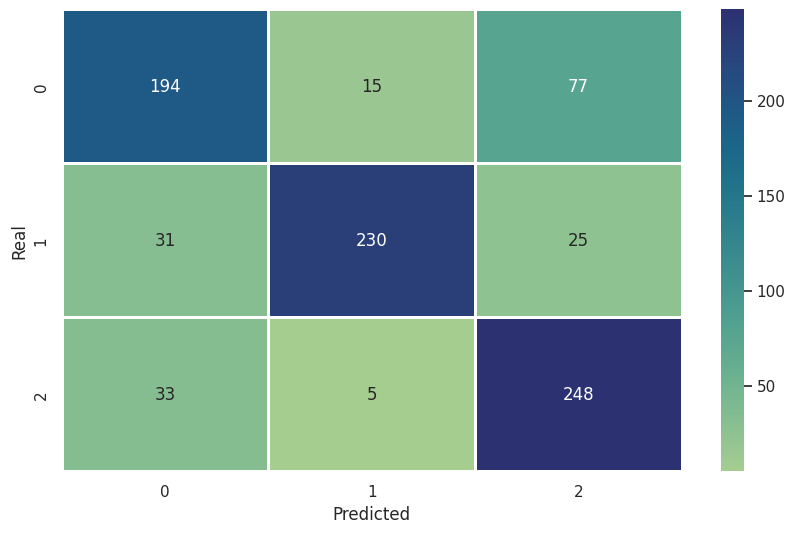

In [152]:
cm = confusion_matrix(y_test, mnb.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidth=.8, cmap="crest", fmt='g')

plt.ylabel("Real")
plt.xlabel("Predicted")

plt.show()

In [153]:
rfc.score(X_test, y_test)

0.8263403263403264

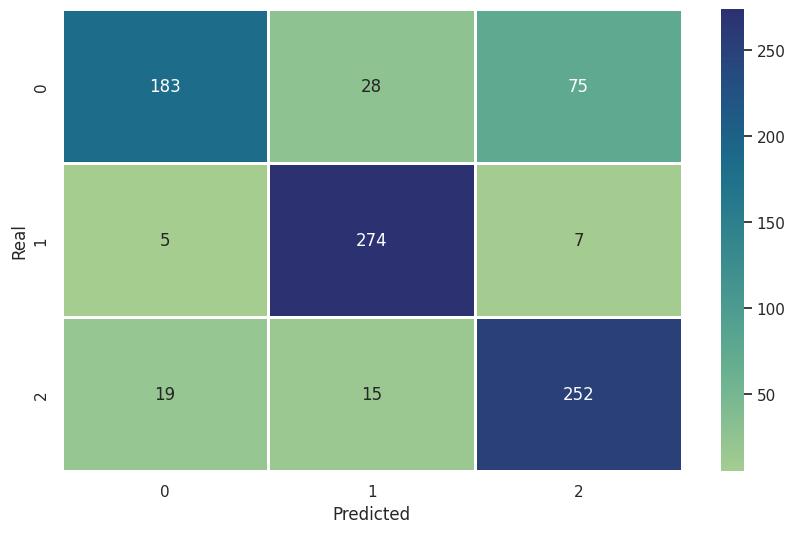

In [154]:
cm = confusion_matrix(y_test, rfc.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidth=.8, cmap="crest", fmt='g')

plt.ylabel("Real")
plt.xlabel("Predicted")

plt.show()

In [155]:
dump(cv, "CV_Twitter.joblib")
dump(mnb, "MNB_Twitter.joblib")
dump(rfc, "RFC_Twitter.joblib")

['RFC_Twitter.joblib']

## Sarcasm Detection

[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection)


In [156]:
from sklearn.naive_bayes import BernoulliNB

### Data Aquisition

In [157]:
sarcasm_data = pd.read_json("https://raw.githubusercontent.com/amankharwal/Website-data/master/Sarcasm.json", lines=True)

In [158]:
sarcasm_data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [159]:
sarcasm_data["is_sarcastic"] = sarcasm_data["is_sarcastic"].map({
    0: "Not Sarcasm", 
    1: "Sarcasm"
})

sarcasm_data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,Not Sarcasm
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,Not Sarcasm
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,Sarcasm
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",Sarcasm
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,Not Sarcasm


In [160]:
sarcasm_data.shape

(26709, 3)

### Exploratory Data Analysis

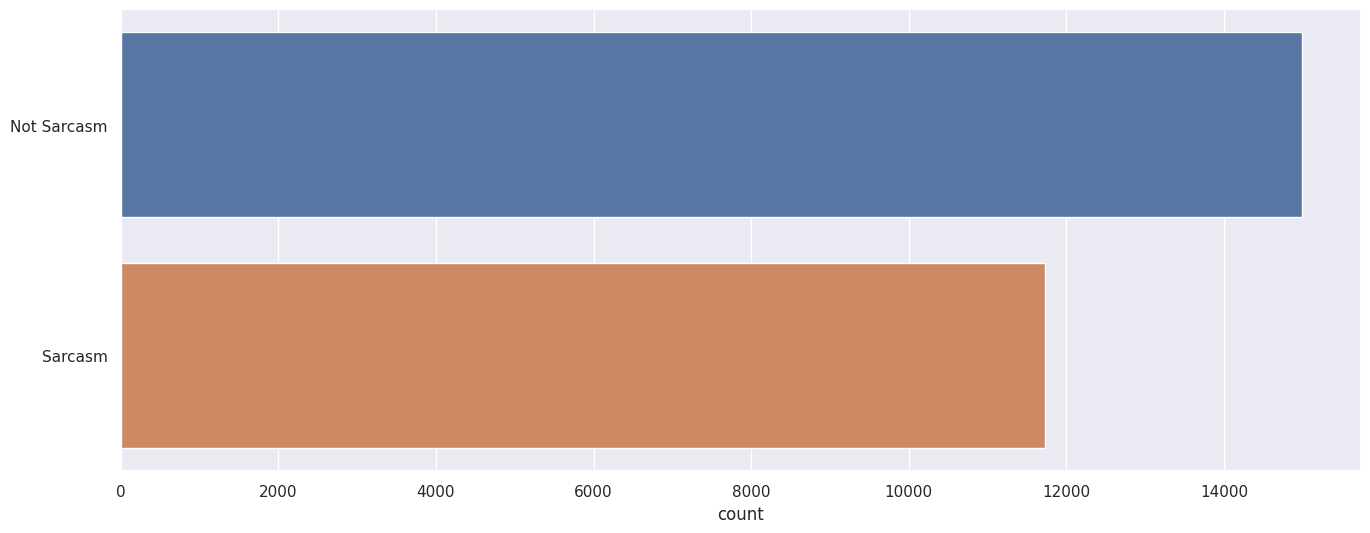

In [161]:
fig, ax = plt.subplots(figsize=(16, 6))

ax = sns.countplot(data=sarcasm_data, y="is_sarcastic")

ax.set_ylabel("")

plt.show()

In [162]:
sarcasm_data["is_sarcastic"].value_counts()

Not Sarcasm    14985
Sarcasm        11724
Name: is_sarcastic, dtype: int64

### Data Treatment

In [163]:
MIN_SIZE = sarcasm_data["is_sarcastic"].value_counts().min()

In [164]:
is_sarcasm  = sarcasm_data.query("is_sarcastic == 'Sarcasm'")
not_sarcasm = sarcasm_data.query("is_sarcastic == 'Not Sarcasm'").sample(MIN_SIZE)

In [165]:
sarcasm_data = pd.concat([is_sarcasm, not_sarcasm])
sarcasm_data = sarcasm_data[["headline", "is_sarcastic"]]

sarcasm_data.reset_index(drop=True, inplace=True)

sarcasm_data["is_sarcastic"].value_counts()

Sarcasm        11724
Not Sarcasm    11724
Name: is_sarcastic, dtype: int64

### Creating Train and Test data

In [166]:
x = np.array(sarcasm_data["headline"])
y = np.array(sarcasm_data["is_sarcastic"])

cv = CountVectorizer()
X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Training Model

In [167]:
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

BernoulliNB()

In [168]:
rfc = RandomForestClassifier()

param_distributions = {
  "n_estimators": list(range(10, 201)),
  "criterion": ["gini", "entropy"],
  "max_depth": [None, 5, 10, 15]
}

RSCV = RandomizedSearchCV(rfc, param_distributions, random_state=42)

In [ ]:
RSCV.fit(X_train, y_train)

In [ ]:
rfc = RSCV.best_estimator_

In [ ]:
rfc.get_params()

### Models Performance

In [ ]:
bnb.score(X_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, bnb.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidth=.8, cmap="crest", fmt='g')

plt.ylabel("Real")
plt.xlabel("Predicted")

plt.show()

In [ ]:
rfc.score(X_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, rfc.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidth=.8, cmap="crest", fmt='g')

plt.ylabel("Real")
plt.xlabel("Predicted")

plt.show()

In [ ]:
dump(cv, "CV_Sarcasm.joblib")
dump(bnb, "BNB_Sarcasm.joblib")
dump(rfc, "RFC_Sarcasm.joblib")

## Hate Speech and Offensive Language Samples

In [ ]:
twitter_data.query("labels == 'No Hate and Offensive'").sample()["tweet"]

In [ ]:
twitter_data.query("labels == 'Offensive Language'").sample()["tweet"]

In [ ]:
twitter_data.query("labels == 'Hate Speech'").sample()["tweet"]

## Sarcasm

In [ ]:
sarcasm_data.query("is_sarcastic == 'Not Sarcasm'").sample()["headline"]

In [ ]:
sarcasm_data.query("is_sarcastic == 'Sarcasm'").sample()["headline"]